In [25]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [26]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

Text(0, 0.5, 'mean smoothness')

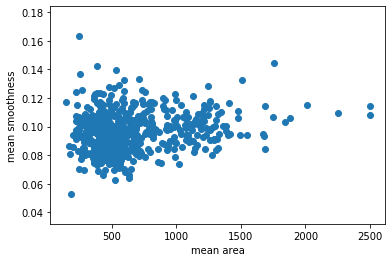

In [30]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

Text(0, 0.5, 'mean smoothness')

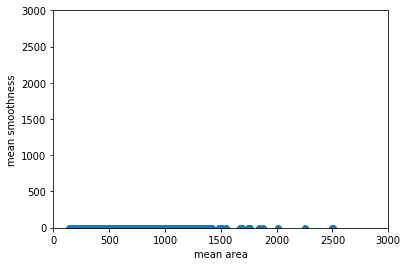

In [31]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlim(0,3000)
plt.ylim(-2,3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

In [32]:
from sklearn.model_selection import ShuffleSplit
y = data.target
X = data.data
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_train_scale = scaler.transform(X_train)

In [36]:
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)

(array([-8.97694617e-16, -3.35165351e-15,  3.23355506e-15, -2.22727819e-15,
        -1.46512838e-15,  5.31740403e-16,  6.61497719e-16,  4.76053873e-16,
        -5.68678194e-15,  6.94804409e-16,  4.90450171e-17,  5.76827963e-16,
         8.10706813e-16,  1.82881793e-16,  1.79160716e-15,  4.15540618e-16,
         3.25502751e-16,  6.02265490e-16, -1.51771148e-16,  1.34580991e-15,
        -4.28960896e-16,  4.92402212e-16, -1.51795548e-15,  1.32494748e-16,
         5.92337534e-15, -4.70369317e-16, -1.36923440e-15,  2.56327316e-16,
        -2.12333204e-15,  1.99242332e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [37]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([1.41124989e+01, 1.91528791e+01, 9.18182857e+01, 6.53819121e+02,
        9.64133407e-02, 1.03318659e-01, 8.74845356e-02, 4.86900264e-02,
        1.80939121e-01, 6.26680220e-02, 4.02523516e-01, 1.20988066e+00,
        2.82524681e+00, 4.02856176e+01, 7.00339341e-03, 2.50632286e-02,
        3.14727859e-02, 1.16463495e-02, 2.05252703e-02, 3.71029516e-03,
        1.62560967e+01, 2.55387473e+01, 1.07031407e+02, 8.81189890e+02,
        1.32459231e-01, 2.51861846e-01, 2.67491334e-01, 1.14447673e-01,
        2.90416044e-01, 8.34914286e-02]),
 array([3.53148742e+00, 4.15439017e+00, 2.42862794e+01, 3.57772373e+02,
        1.37841928e-02, 5.04344575e-02, 7.77159693e-02, 3.85550295e-02,
        2.73677762e-02, 6.81132951e-03, 2.84057900e-01, 5.41365325e-01,
        2.03551332e+00, 4.76779413e+01, 2.84053720e-03, 1.74905171e-02,
        3.10715741e-02, 5.89071328e-03, 8.18748246e-03, 2.60681955e-03,
        4.88517629e+00, 6.09392372e+00, 3.38319477e+01, 5.85750909e+02,
        2.26008843e-02

In [38]:
X_test_scale = scaler.transform(X_test)

In [39]:
X_test_scale.mean(axis=0), X_test_scale.std(axis=0)

(array([ 0.02090746,  0.16431947,  0.03098112,  0.01492717, -0.01921272,
         0.10117401,  0.0844404 ,  0.02966118,  0.04062282,  0.09495981,
         0.04653793,  0.06428685,  0.10007503,  0.00538732,  0.06604308,
         0.11840198,  0.06761678,  0.12691574,  0.01038083,  0.16199868,
         0.01337734,  0.11341872,  0.03390329, -0.00517026, -0.02001641,
         0.07842833,  0.11756483,  0.01212835, -0.02700757,  0.12745382]),
 array([0.98484055, 1.15221352, 0.99783441, 0.91061412, 1.09332501,
        1.20997119, 1.11614317, 1.02702513, 1.0034221 , 1.16404942,
        0.86929934, 1.0858183 , 0.95738032, 0.73797558, 1.25386932,
        1.10490478, 0.84120579, 1.20933979, 1.04289005, 1.05896921,
        0.94112182, 1.03290198, 0.96071254, 0.84629366, 1.04571542,
        1.12996138, 1.20450506, 1.03208579, 0.90829415, 1.06246714]))

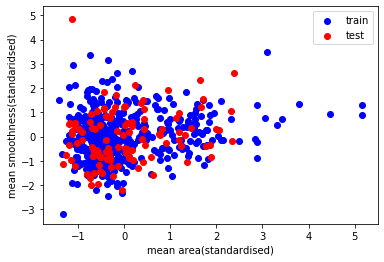

In [40]:
plt.scatter(X_train_scale[:, 3],X_train_scale[:, 4], 
           c='blue', label="train")
plt.scatter(X_test_scale[:, 3], X_test_scale[:, 4],
           c='red', label='test')
plt.xlabel(data.feature_names[3] + "(standardised)")
plt.ylabel(data.feature_names[4] + "(standaridsed)")
plt.legend(loc="best")

In [41]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [43]:
clf.fit(X_train_scale, y_train)
print(clf.score(X_test_scale, y_test))

0.9649122807017544


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.956140350877193


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## range

In [45]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler([-1,1])

In [46]:
mmscaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=[-1, 1])

In [48]:
X_train_mms = mmscaler.transform(X_train)
X_test_mms = mmscaler.transform(X_test)

In [49]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))

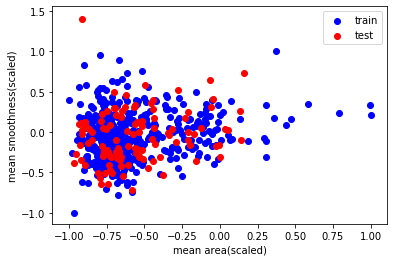

In [51]:
plt.scatter(X_train_mms[:, 3],X_train_mms[:, 4], 
           c='blue', label="train")
plt.scatter(X_test_mms[:, 3], X_test_mms[:, 4],
           c='red', label='test')
plt.xlabel(data.feature_names[3] + "(scaled)")
plt.ylabel(data.feature_names[4] + "(scaled)")
plt.legend(loc="best")

In [52]:
clf.fit(X_train_mms, y_train)
print(clf.score(X_test_mms, y_test))

0.9649122807017544


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Normalization

In [53]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [54]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [55]:
np.linalg.norm(X_train, axis=1)[:20]

array([3.10311913e+02, 4.18045141e+02, 2.02590512e+03, 1.58979129e+04,
       2.07747900e+00, 2.45241979e+00, 2.49608868e+00, 1.32477548e+00,
       3.90346283e+00, 1.34462716e+00, 1.05088012e+01, 2.82733774e+01,
       7.42766920e+01, 1.33144030e+03, 1.61207499e-01, 6.51926410e-01,
       9.43382442e-01, 2.78394991e-01, 4.71366443e-01, 9.67244450e-02])

In [57]:
np.linalg.norm(X_train_norm, axis=1)[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [58]:
clf.fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.7192982456140351


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


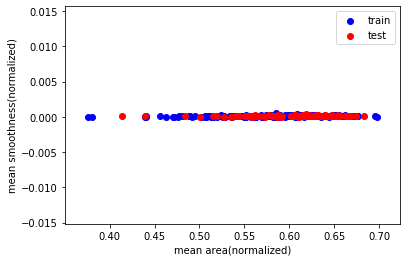

In [59]:
plt.scatter(X_train_norm[:, 3],X_train_norm[:, 4], 
           c='blue', label="train")
plt.scatter(X_test_norm[:, 3], X_test_norm[:, 4],
           c='red', label='test')
plt.xlabel(data.feature_names[3] + "(normalized)")
plt.ylabel(data.feature_names[4] + "(normalized)")
plt.legend(loc="best")

In [61]:
for norm in ['l2', 'l1', 'max']:
    normalizer = Normalizer(norm=norm)
    normalizer.fit(X_train)
    X_train_norm = normalizer.transform(X_train)
    X_test_norm = normalizer.transform(X_test)
    clf.fit(X_train_norm, y_train)
    print(norm, clf.score(X_test_norm, y_test))

l2 0.7192982456140351
l1 0.6052631578947368
max 0.8157894736842105


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## PCA whitening

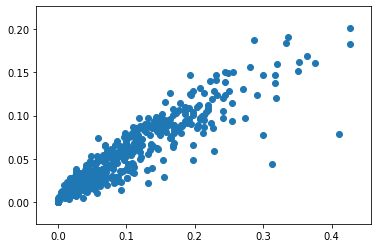

In [62]:
plt.scatter(data.data[:, 6], data.data[:, 7])

(0, 0.5)

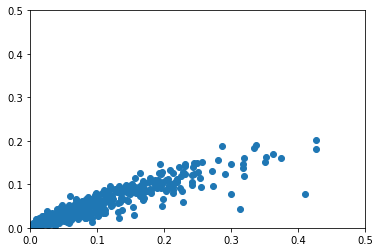

In [63]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

(-0.25, 0.25)

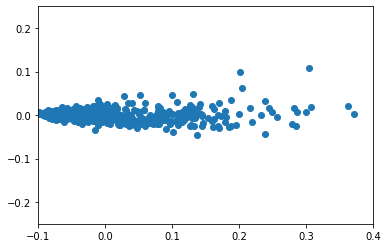

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [65]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([1.46338712e-18, 3.29262101e-18]), array([0.08751603, 0.01371268]))